In [94]:
import os
import sys
import numpy as np
import myfuncs as my
import pandas as pd
import scipy.stats as st
import scipy.signal as sig
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
%load_ext autoreload
%autoreload 2
mpl.rc("savefig", dpi=300)
import matplotlib.pyplot as plt
os.getenv("HOME")
os.chdir(os.getenv("HOME") + "/Google Drive/CSU/ATS 655/")
os.getcwd()

'/Users/ldavis/Google Drive/CSU/ATS 655'

## Red noise series 
**Note for generating variables, numpy.random much faster.**

In [463]:
N = 5000
T = np.zeros((N,4))
rhos = (0, 0.251, 0.5, 0.922)
for r, rho in enumerate(rhos):
    T[0,r] = np.random.standard_normal()
    for i in range(N-1):
        T[i+1,r] = rho*T[i,r] + np.sqrt(1-rho**2)*np.random.standard_normal()
T

array([[ 2.64666009, -0.93504657, -0.00957438,  0.35357762],
       [-0.94358397, -2.665846  , -0.3656451 , -0.04384589],
       [ 1.71759145, -0.22895559,  0.58960577,  0.70694294],
       ..., 
       [ 1.75324849,  1.44358514, -0.05326244,  0.92294089],
       [ 0.97701171, -0.30266849,  0.13792283,  0.50460453],
       [-0.31014891, -1.3764583 ,  0.58866497,  0.39647784]])

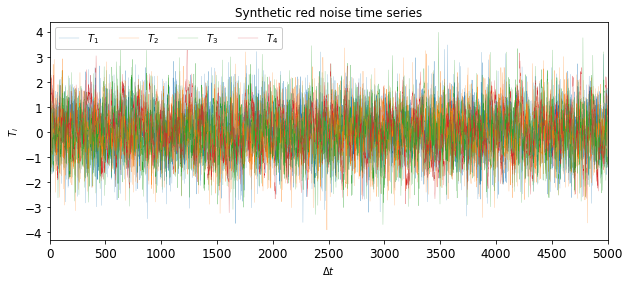

In [464]:
fig, ax = plt.subplots(figsize=(10,4))
p=ax.plot(T, linewidth=.2)
T.shape
ax.set_xlim((0,N))
ax.tick_params(labelsize=12)
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('$T_i$')
ax.set_xticks(np.arange(0,N+1,500))
ax.set_title('Synthetic red noise time series')
ax.legend(p, ['$T_1$', '$T_2$', '$T_3$', '$T_4$'], loc=0, ncol=4, framealpha=1)
plt.show()
fig.savefig('a3_1.pdf', format='pdf', dpi='figure')


## Histograms

In [465]:
n = 1000000
a = np.random.randint(N-100, size=(n,4))
std_bin = np.zeros((n,4))
mean_bin = np.zeros((n,4))
for r in range(4):
    print('Series %d' % r)
    for j in range(n):
        i = a[j,r]
        std_bin[j,r] = T[i:i+100,r].std()
        mean_bin[j,r] = T[i:i+100,r].mean()

Series 0
Series 1
Series 2
Series 3


In [215]:
1==10*.1


True

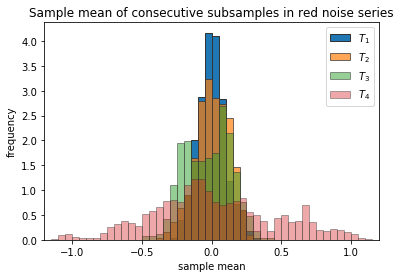

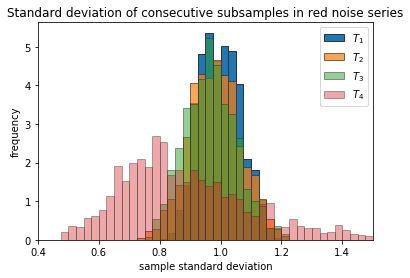

In [227]:
mean_bin
f2, a2 = plt.subplots()
alphas = (1,0.7,0.5,0.4)
# mean
b = np.arange(-2,2.1,.05)
c = '#333333'
a2.hist(mean_bin[:,0], edgecolor=c, bins=b, normed=True, alpha=alphas[0], label='$T_1$')
a2.hist(mean_bin[:,1], edgecolor=c, bins=b, normed=True, alpha=alphas[1], label='$T_2$')
a2.hist(mean_bin[:,2], edgecolor=c, bins=b, normed=True, alpha=alphas[2], label='$T_3$')
a2.hist(mean_bin[:,3], edgecolor=c, bins=b, normed=True, alpha=alphas[3], label='$T_4$')
a2.set_title('Sample mean of consecutive subsamples in red noise series')
a2.set_xlim((-1.2,1.2))
a2.legend()
a2.set_xlabel('sample mean')
a2.set_ylabel('frequency')
f2.savefig('a3_1a1.pdf', format='pdf', dpi='figure')
# std
f3, a3 = plt.subplots()
b = np.arange(0,2.1,.025)
a3.hist(std_bin[:,0], edgecolor=c, bins=b, normed=True, alpha=alphas[0], label='$T_1$')
a3.hist(std_bin[:,1], edgecolor=c, bins=b,normed=True, alpha=alphas[1], label='$T_2$')
a3.hist(std_bin[:,2], edgecolor=c, bins=b,normed=True, alpha=alphas[2], label='$T_3$')
a3.hist(std_bin[:,3], edgecolor=c, bins=b,normed=True, alpha=alphas[3], label='$T_4$')
a3.set_title('Standard deviation of consecutive subsamples in red noise series')
a3.set_xlim((0.4,1.5))
a3.legend()
a3.set_xlabel('sample standard deviation')
a3.set_ylabel('frequency')
f3.savefig('a3_1a2.pdf', format='pdf', dpi='figure')
# show
plt.show()

In [185]:
print(np.random.standard_normal(size=1))
%timeit (np.random.standard_normal(size=100000))
%timeit (np.random.normal(size=100000))
%timeit (st.norm.rvs(size=100000))
%timeit (np.random.standard_normal())
%timeit (np.random.normal())
%timeit (st.norm.rvs())

[ 1.46917608]
100 loops, best of 3: 3.1 ms per loop
100 loops, best of 3: 3.37 ms per loop
100 loops, best of 3: 3.19 ms per loop
The slowest run took 21.80 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 440 ns per loop
The slowest run took 12.70 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.75 µs per loop
10000 loops, best of 3: 27 µs per loop


## A2 Revisit 

[ 0.  0.  0. ...,  0.  0.  0.]
[ 399 3576 3523 ..., 4417 4088 4553]


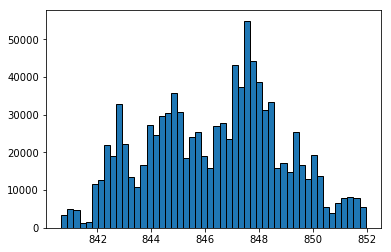

Mean:  846.359456722 , stdev:  2.48964675196


In [246]:
r = pd.read_csv('a2_R.csv').values.flatten()
p = pd.read_csv('a2_P.csv').values.flatten()
n = 1000000
N = (r>0).sum()
m = np.zeros(n)

# old method
# for i in range(n):
#     if i % 1000 == 0:
#         print(i)
#     m[i] = np.random.choice(p,replace=False,size=N).mean()

# new method
print(m)
print(ids)
ids = np.random.randint(p.size-N, size=n)
for i in range(n):
    m[i] = p[ids[i]:ids[i]+N].mean()
    
fig, ax = plt.subplots()
ax.hist(m,bins=50,edgecolor='k')
plt.show()
print('Mean: ',m.mean(),', stdev: ',m.std())
p_select = p[r>0].mean()
stat1 = (p_select>m).sum()/m.size

In [247]:
print(stat1)
p_select

0.545155


847.03062499999999

## ENSO and temperature

In [304]:
T = pd.read_csv('a3_T.csv',squeeze=True)
enso = pd.read_csv('a3_enso.csv',squeeze=True)
f = lambda x: (x-x.mean())/x.std()
d = pd.DataFrame({'T': T, 'enso': enso, 'T_s': f(T), 'enso_s': f(enso)})
d

T       T_s      enso    enso_s
0    0.145300  0.199947  1.159000  1.517639
1   -0.023480 -0.516256  0.866210  1.118517
2   -0.029557 -0.542043  0.371130  0.443639
3   -0.031578 -0.550619  0.280500  0.320095
4   -0.048655 -0.623083  0.428110  0.521313
5   -0.034405 -0.562615  0.355590  0.422456
6   -0.032654 -0.555185  0.229830  0.251024
7   -0.093112 -0.811733 -0.218550 -0.360194
8   -0.015891 -0.484052  0.035108 -0.014415
9   -0.017562 -0.491143  0.078362  0.044547
10   0.016139 -0.348136  0.035603 -0.013741
11   0.031312 -0.283751  0.045059 -0.000850
12  -0.030286 -0.545136  0.080826  0.047906
13  -0.010295 -0.460306  0.430820  0.525007
14  -0.026550 -0.529283  0.456510  0.560027
15  -0.084645 -0.775804  0.212690  0.227659
16   0.001493 -0.410287 -0.133970 -0.244897
17  -0.070864 -0.717325 -0.226230 -0.370663
18  -0.028680 -0.538321 -0.222940 -0.366178
19  -0.022994 -0.514193 -0.216360 -0.357209
20  -0.117310 -0.914415  0.412250  0.499693
21  -0.249480 -1.475266  0.089469  0.059688
22  -0.143780 -1.026738  0.095651  0.068115
23  -0.097217 -0.829152  0.028627 -0.023250
24   0.089683 -0.036059 -0.066743 -0.153255
25  -0.398060 -2.105752  0.175700  0.177235
26  -0.238590 -1.429055  0.104140  0.079687
27  -0.225750 -1.374570  0.037499 -0.011156
28  -0.077452 -0.745281 -0.175530 -0.301550
29  -0.082724 -0.767652 -0.217920 -0.359335
..        ...       ...       ...       ...
581  0.439800  1.449631  0.016607 -0.039635
582  0.495660  1.686668  0.307950  0.357514
583  0.427640  1.398031  0.606920  0.765061
584  0.492290  1.672367  0.624680  0.789271
585  0.450850  1.496520  0.926040  1.200075
586  0.540730  1.877918  0.926220  1.200321
587  0.645170  2.321100  0.553050  0.691627
588  0.525610  1.813758  0.142190  0.131555
589  0.445060  1.471951 -0.110970 -0.213544
590  0.479500  1.618094 -0.287330 -0.453953
591  0.380760  1.199100 -0.392180 -0.596881
592  0.382610  1.206950 -0.448970 -0.674295
593  0.412470  1.333658 -0.511290 -0.759248
594  0.383090  1.208987 -0.580800 -0.854002
595  0.419530  1.363617 -0.788790 -1.137527
596  0.375750  1.177840 -1.256000 -1.774413
597  0.274510  0.748238 -1.435400 -2.018966
598  0.225870  0.541838 -1.257700 -1.776731
599  0.029960 -0.289488 -1.569600 -2.201903
600  0.194550  0.408935 -1.283000 -1.811219
601  0.482020  1.628788 -0.991350 -1.413651
602  0.283040  0.784434 -0.861020 -1.235989
603  0.284800  0.791902 -0.578540 -0.850921
604  0.313850  0.915173 -0.536680 -0.793859
605  0.420710  1.368624 -0.122630 -0.229439
606  0.399570  1.278918 -0.067911 -0.154848
607  0.377030  1.183272 -0.235320 -0.383054
608  0.463800  1.551473 -0.351480 -0.541400
609  0.410480  1.325214 -0.371550 -0.568759
610  0.322460  0.951709 -0.740380 -1.071536

[611 rows x 4 columns]

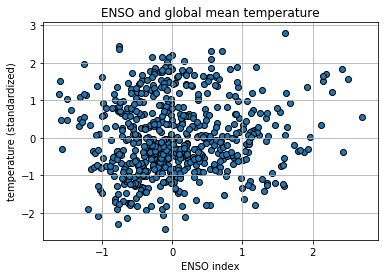

In [277]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(enso, T_s, marker='o', edgecolors='k')
ax.set_ylabel('temperature (standardized)')
ax.set_xlabel('ENSO index')
ax.set_title('ENSO and global mean temperature')
ax.grid(True, which='both')
plt.show()
fig.savefig('a3_2a.pdf', format='pdf', dpi='figure')

In [323]:
# Get correlation coefficient
rho = d.corr()['T']['enso_s']

In [334]:
# Get correlation and regressions
rho = np.corrcoef(d['T'], d['enso_s'])[1,0]
a, b, r, p, err = st.linregress(d['enso_s'], d['T'])
a, b, r, p, err, r**2

(0.021052446088670337,
 0.098180593911620304,
 0.089334135376558266,
 0.027237812977078495,
 0.0095112273850710607,
 0.0079805877434772389)

In [348]:
# Hello, hello, goodbye, goodbye
N = d.shape[0]
t = r*np.sqrt(N/3-2)/np.sqrt(1-r**2)
F = st.t.cdf(t, N/3-2)
min([F,1-F])

0.10211412580564971

In [358]:
# Composites
p = d['T'][d['enso']>=1].mean()
m = d['T'][d['enso']<=-1].mean()
print(p,m)
print( (d['enso']>=1).sum(), (d['enso']<=-1).sum() )
T[enso>1].mean(), T[enso<=-1].mean()

0.12050470857142856 0.11724548387096774
70 31


(0.12050470857142856, 0.11724548387096774)

In [376]:
f = lambda x, n: (x-T.mean())/(T.std()/np.sqrt(n))
# stuff
N_p = T[enso>=1].size
N_m = T[enso<=-1].size
p = T[enso>1].mean()
m = T[enso<=-1].mean()
s_p = T[enso>=1].std()
s_m = T[enso<=-1].std()
# p
F_p = st.t.cdf(f(p, N_p/3-1), N_p/3-1)
F_m = st.t.cdf(f(m, N_m/3-1), N_m/3-1)
p_p = min([F_p,1-F_p])
p_m = min([F_m,1-F_m])
print(p_p, p_m)
# p alt
f = lambda x, s, n: (x-T.mean())/(s/np.sqrt(n))
F_p = st.t.cdf(f(p, s_p, N_p/3-1), N_p/3-1)
F_m = st.t.cdf(f(m, s_m, N_m/3-1), N_m/3-1)
p_p = min([F_p,1-F_p])
p_m = min([F_m,1-F_m])
print(p_p, p_m)
# another alt
f = lambda x, n: (x-0)/(T.std()/np.sqrt(n))
F_p = st.t.cdf(f(p, N_p/3-1), N_p/3-1)
F_m = st.t.cdf(f(m, N_m/3-1), N_m/3-1)
p_p = min([F_p,1-F_p])
p_m = min([F_m,1-F_m])
print(p_p, p_m)

0.329348882611 0.405070111591
0.323325051123 0.407148241186
0.0121356943155 0.0808242398862


In [380]:
F_d = st.t.cdf((p-m) / 
              (
                np.sqrt(((N_p/3-1)*s_p**2 + (N_m/3-1)*s_m**2)/(N_p/3 + N_m/3 -2))
              * np.sqrt(1/N_p + 1/N_m)
              ),
               N_p/3 + N_m/3 - 2
              )
p = min([F_d, 1-F_d])
print(p)

0.474161856163


## NHC Stuff

In [403]:
nhc = pd.read_csv('a3_nhc.csv',header=None)
RMSE = lambda x, y: np.sqrt((1/x.size)*((x-y)**2).sum())
MAE = lambda x, y: (1/x.size)*np.abs(x-y).sum()
a = MAE(nhc[0], nhc[1])
r = RMSE(nhc[0], nhc[1])
a, r

(13.935, 18.905686975087683)

In [425]:
# Get regression
a, b, _,_,_ = st.linregress(nhc[1].values, nhc[0].values)
a, b

(0.92332742236774212, 7.1016438726795741)

In [426]:
# Get RMSE, etc.
x = np.arange(nhc[1].size)
a_ = MAE(nhc[0],nhc[1].values*a+b)
r_ = RMSE(nhc[0],nhc[1].values*a+b)
a_, r_

(14.033070755493295, 18.669065031985319)

In [429]:
# Get new RMSE, etc.
a_ = MAE(nhc[0],nhc[1]*1 + 4.182e-6)
r_ = RMSE(nhc[0],nhc[1]*1 + 4.182e-6)
a_, r_

(13.935000150551994, 18.905686438670173)

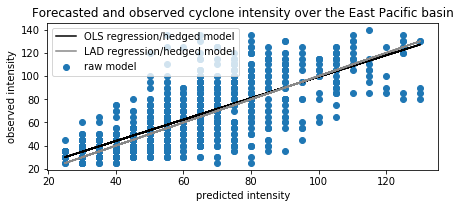

In [456]:
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(nhc[1], nhc[0], label='raw model')
ax.set_xlabel('predicted intensity')
ax.set_ylabel('observed intensity')
ax.plot(nhc[1].values, nhc[1].values*a+b, label='OLS regression/hedged model', color='k', linestyle='-')
ax.plot(nhc[1].values, nhc[1].values*1+4.182e-6, label='LAD regression/hedged model', color='#888888', linestyle='-')
ax.legend()
ax.set_title('Forecasted and observed cyclone intensity over the East Pacific basin')
fig.subplots_adjust(bottom=0.2)
plt.show()
fig.savefig('a3_3c.pdf', format='pdf', dpi='figure')

In [443]:
help(fig.subplots_adjust)

Help on method subplots_adjust in module matplotlib.figure:

subplots_adjust(*args, **kwargs) method of matplotlib.figure.Figure instance
    Call signature::
    
      subplots_adjust(left=None, bottom=None, right=None, top=None,
                          wspace=None, hspace=None)
    
    Update the :class:`SubplotParams` with *kwargs* (defaulting to rc when
    *None*) and update the subplot locations



In [461]:
obs = nhc[0].values
pred = nhc[1].values
a, b, _,_,_ = st.linregress(np.append(pred, [90,115,150,180,185,180]),np.append(obs, [70,70,75,80,80,85]))
a, b

(0.84797000556927471, 11.326934895914256)

In [459]:
a = np.array([1,2,3])
np.append(a, [1,2,3])

array([1, 2, 3, 1, 2, 3])